#  EDA And Feature Engineering on Black Friday Dataset

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**converting categorical feature to numerical : 'Gender'**](#Section51)
  - **5.2** [**converting categorical feature to numerical : 'Age'**](#Section52)
  - **5.3** [**converting categorical feature to numerical : 'City_Category'**](#Section53)
  - **5.4** [**Missing values**](#Section54)
  - **5.5** [**Handling dtype**](#Section55)
  
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Distribution of purchase over Age and Gender**](#Section61)
  - **6.2** [**Distribution of purchase over occupation and Gender**](#Section62)
  - **6.3** [**Distribution of purchase over product_category_1 and Gender**](#Section63)
  - **6.4** [**Distribution of purchase over product_category_2 and Gender**](#Section64)
  - **6.5** [**Distribution of purchase over product_category_3 and Gender**](#Section65)

**7.** [**Feature Scaling**](#Section7)<br>

---
<a name = Section1></a>
# **1.Introduction**
---

<center><img width=60% src="https://www.seren.bangor.ac.uk/wp-content/uploads/2019/11/black-friday-2894130_1920.png"></center>


- Black Friday is a colloquial term for the Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the United States. Many stores offer highly promoted sales at discounted prices
- Occurring on the fourth Friday in November unless November 1 is a Friday, Black Friday has routinely been the busiest shopping day of the year in the United States since 2005

---
<a name = Section2></a>
# **2.Problem statement**
---

<center><img width=60% src="https://cdn.winsightmedia.com/platform/files/public/2017-11/background/800x420/black-friday-neon_1511294329.jpg"></center>

- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

<a name = Section32></a>
### **3.2 Upgrading Libraries**


In [10]:
!pip install -q --upgrade pandas_profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
​
This dataset was obtained from Kaggle.

In [12]:
df_train = pd.read_csv('train.csv.zip')

In [13]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
df_train.shape

(550068, 12)

In [16]:
df_test = pd.read_csv('test.csv.zip')

In [17]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


- combine both data sets using append feature .

In [19]:
df = df_train.append(df_test)
df.head()

/var/folders/4_/1f0tnvbd06d3jcdzbl37xphc0000gn/T/ipykernel_63246/3394615110.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.
- object can be a categorical , text ,integer variable
- The df.describe() function will take only colums who has integer or float as data type and it will exclude all the object varibles.

In [22]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


- User_ID is not very useful to use and also we can consider dropping it to make the data have the only columns useful to us

In [ ]:
df.drop(['User_ID'] , axis =1 , inplace = True )


In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


- age is considered as object variable since it is bucket range of values 
- product ID is unique so it is considered as object variable 


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

- The model we build will not understand object type so the features we want to work on should be converted from categorical to numerical 
- We have to handle categorical features into int or float
- This can be done in two ways

<a name = Section51></a>
### **5.1 converting categorical feature to numerical : 'Gender'**

In [32]:
#method 1:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#method 2:
df['Gender']=pd.get_dummied(df['Gender'],drop_first =1)

- let us handle Categorical feature Age to numberical

<a name = Section52></a>
### **5.2 converting categorical feature to numerical : 'Age'**

In [36]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

- we can convert the age column using get dummies 
- code : pd.get_dummie(df['Age'],drop_first=True)
- but from the data we can see the people from the age of '0-17' would be very less and from the age of '18-25' , '26-35',... would be more and also 55+ would also be less
- so , instead of get dummies we can rank them as 0,1,2,3,4... so that the model we build would understand it better

In [37]:
# one way of doing the encoding
df['Age']=df['Age'].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [45]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,4,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,4,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,4,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [ ]:
#second way of doing the encoding
#Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
  
df['Age'].unique()

<a name = Section53></a>
### **5.3 converting categorical feature to numerical : 'City_Category'**

In [48]:
df_city=pd.get_dummies(df['City_Category'],drop_first=1)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [62]:
df = pd.concat([df,df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [64]:
df.drop('City_Category',axis=1, inplace = True) # drop city category as we don't need it anymore

In [65]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,2,16,4+,0,8,NaN,NaN,7969.0,0,1


<a name = Section54></a>
### **5.4 Missing Values**

In [66]:
# missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [74]:
# as we can see many null values , there  are null in purchase values as it is test data
# so first let us handle Product_Category_2 , Product_Category_3 
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [75]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [78]:
#as these are discrete values we replace the missing values with mode
df['Product_Category_2'].mode()[0]

8.0

In [80]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [81]:
df['Product_Category_2'].isnull().sum() # as we can see we have handled all the missing values

0

- handling missing values for product catergory 3

In [84]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [86]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [82]:
df['Product_Category_3'].mode()[0] 

16.0

In [87]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [88]:
df['Product_Category_3'].isnull().sum() # as we can see we have handled all the missing values

0

In [89]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [90]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,2,16,4+,0,8,8.0,16.0,7969.0,0,1


In [92]:
df['Stay_In_Current_City_Years'].unique() # we can replace the + with just 4 here 

array(['2', '4+', '3', '1', '0'], dtype=object)

In [93]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/4_/1f0tnvbd06d3jcdzbl37xphc0000gn/T/ipykernel_63246/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [94]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,2,16,4,0,8,8.0,16.0,7969.0,0,1


In [95]:
df['Stay_In_Current_City_Years'].unique() # we have removed + 

array(['2', '4', '3', '1', '0'], dtype=object)

<a name = Section55></a>
### **5.5 Handling dtypes**

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Product_ID                   783667 non-null  object 
 1   Gender                       783667 non-null  int64  
 2   Age                          783667 non-null  int64  
 3   Occupation                   783667 non-null  int64  
 4   Stay_In_Current_City_Years   783667 non-null  object 
 5   Marital_Status               783667 non-null  int64  
 6   Product_Category_1           783667 non-null  int64  
 7   Product_Category_2           783667 non-null  float64
 8   Product_Category_3           783667 non-null  float64
 9   Purchase                     550068 non-null  float64
 10  B                            783667 non-null  uint8  
 11  C                            783667 non-null  uint8  
 12  Stay_In_Current_City_Years   783667 non-null  int64  
dtyp

In [97]:
# convert object intp integer in dtype

In [106]:
 df['Stay_In_Current_City_Years'].astype(int)

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int64

In [110]:
type('Stay_In_Current_City_Years')

str

In [114]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Product_ID                   783667 non-null  object 
 1   Gender                       783667 non-null  int64  
 2   Age                          783667 non-null  int64  
 3   Occupation                   783667 non-null  int64  
 4   Stay_In_Current_City_Years   783667 non-null  int64  
 5   Marital_Status               783667 non-null  int64  
 6   Product_Category_1           783667 non-null  int64  
 7   Product_Category_2           783667 non-null  float64
 8   Product_Category_3           783667 non-null  float64
 9   Purchase                     550068 non-null  float64
 10  B                            783667 non-null  uint8  
 11  C                            783667 non-null  uint8  
 12  Stay_In_Current_City_Years   783667 non-null  int64  
dtyp

In [117]:
# we can change the dtype of B and C
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Product_ID                   783667 non-null  object 
 1   Gender                       783667 non-null  int64  
 2   Age                          783667 non-null  int64  
 3   Occupation                   783667 non-null  int64  
 4   Stay_In_Current_City_Years   783667 non-null  int64  
 5   Marital_Status               783667 non-null  int64  
 6   Product_Category_1           783667 non-null  int64  
 7   Product_Category_2           783667 non-null  float64
 8   Product_Category_3           783667 non-null  float64
 9   Purchase                     550068 non-null  float64
 10  B                            783667 non-null  int64  
 11  C                            783667 non-null  int64  
 12  Stay_In_Current_City_Years   783667 non-null  int64  
dtyp

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

<a name = Section61></a>
### **6.1 Distribution of purchase over Age and Gender**

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

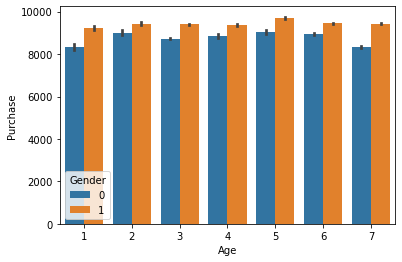

In [122]:
sns.barplot('Age','Purchase' , hue = 'Gender' , data =df) # age vs purchase , f : 0 , M : 1

- This is almost uniform distribution
- as we can see purchase of men is high over women 
- purchase remains almost same for all ages 
- we can also say thaat purchase demand is equally probable with respect to all ages.


<a name = Section62></a>
### **6.2 Distribution of purchase over occupation and Gender**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

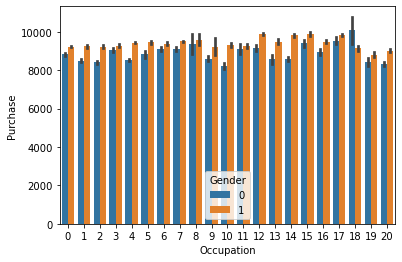

In [123]:
# viz of purchase vs occupation
sns.barplot('Occupation','Purchase' , hue = 'Gender' , data =df)

<a name = Section63></a>
### **6.3 Distribution of purchase over product_category_1 and Gender**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

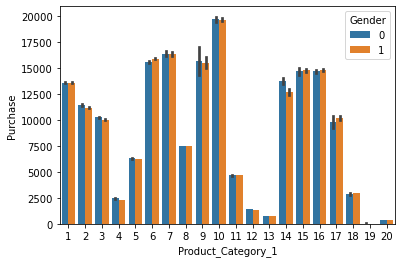

In [124]:
sns.barplot('Product_Category_1','Purchase' , hue = 'Gender' , data =df)

<a name = Section64></a>
### **6.4 Distribution of purchase over product_catergory_2 and Gender**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

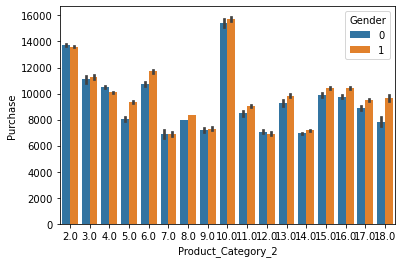

In [125]:
sns.barplot('Product_Category_2','Purchase' , hue = 'Gender' , data =df)

<a name = Section65></a>
### **6.5 Distribution of purchase over product_category_3 and Gender**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

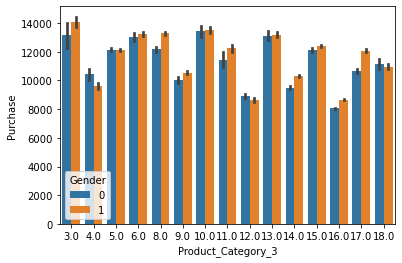

In [126]:
sns.barplot('Product_Category_3','Purchase' , hue = 'Gender' , data =df)

In [127]:
# we can also drop product id 


<a name = Section7></a>

---
# **7. Feature Scaling**
---

In [130]:
df_test =df[df['Purchase'].isnull()]

In [134]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,Stay_In_Current_City_Years
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0,2
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1,0
2,P00288442,0,6,1,4,1,5,14.0,16.0,NaN,1,0,4
3,P00145342,0,6,1,4,1,4,9.0,16.0,NaN,1,0,4
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1,1


In [131]:
df_train =df[~df['Purchase'].isnull()]

In [135]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,Stay_In_Current_City_Years
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0,2
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,2
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0,2
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0,2
4,P00285442,1,2,16,4,0,8,8.0,16.0,7969.0,0,1,4


In [132]:
X=df_train.drop('Purchase',axis=1)

In [133]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Stay_In_Current_City_Years
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0,2
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0,2
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0,2
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0,2
4,P00285442,1,2,16,4,0,8,8.0,16.0,0,1,4


In [137]:
Y=df_train['Purchase']

In [138]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [139]:
X.shape

(550068, 12)

In [140]:
Y.shape

(550068,)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [142]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [143]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## The data has been cleaned , pre processed , all the missing values have been handled , the data type of the columns have been rectified 
## The data has been 